In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("dataSet_business.csv")

In [3]:
df.describe()

,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,Ambience casual_ False,Ambience casual_ True,Ambience classy_ False,Ambience classy_ True,Ambience hipster_ False,Ambience hipster_ True,Ambience intimate_ False,...,RestaurantsReservations_False,RestaurantsReservations_True,RestaurantsTableService_False,RestaurantsTableService_True,RestaurantsTakeOut_False,RestaurantsTakeOut_True,WiFi_free,WiFi_no,WiFi_paid,stars
count,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.00000,55775.000000,...,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000,55775.000000
mean,0.111555,0.304563,0.368929,0.412819,0.383953,0.779274,0.017499,0.779991,0.01628,0.785890,...,0.540134,0.348023,0.288068,0.488498,0.058503,0.858431,0.334684,0.374343,0.005648,3.450238
std,0.314821,0.460226,0.482519,0.492345,0.486351,0.414740,0.131122,0.414256,0.12655,0.410207,...,0.498391,0.476348,0.452867,0.499872,0.234694,0.348610,0.471884,0.483957,0.074939,0.794730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.500000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [4]:
df["stars"].replace([1.0,1.5,2.0],0,inplace=True)
df["stars"].replace([5.0],1,inplace=True)

In [5]:
df1 = df[df["stars"].isin({1.0,0})]
X = df1.drop("stars", axis=1)
Y = df1["stars"]

In [6]:
ranks = {}

names = X.columns
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
# stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict( rfe.ranking_, names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
 
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in names:
    print ("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


	Corr.	Lasso	Linear reg	RF	RFE	Ridge	Mean
Alcohol_beer_and_wine	0.04	0.0	0.0	0.23	0.07	0.15	0.08
Alcohol_full_bar	0.01	0.0	0.0	0.26	0.31	0.45	0.17
Alcohol_none	0.12	0.0	0.0	0.48	0.03	0.01	0.11
Ambience casual_ False	0.17	0.0	0.08	0.2	0.63	0.19	0.21
Ambience casual_ True	0.0	0.0	0.08	0.19	0.61	0.13	0.17
Ambience classy_ False	0.23	0.0	0.09	0.07	0.66	0.15	0.2
Ambience classy_ True	0.05	0.0	0.09	0.04	0.64	0.49	0.22
Ambience hipster_ False	0.24	0.0	0.0	0.08	0.56	0.3	0.2
Ambience hipster_ True	0.1	0.0	0.0	0.04	0.57	1.0	0.28
Ambience intimate_ False	0.23	0.0	0.33	0.06	1.0	0.21	0.3
Ambience intimate_ True	0.08	0.0	0.33	0.02	1.0	0.54	0.33
Ambience touristy_ False	0.19	0.0	0.32	0.07	1.0	0.54	0.35
Ambience touristy_ True	0.02	0.0	0.32	0.0	0.99	0.2	0.26
Ambience trendy_ False	0.25	0.0	0.09	0.08	0.7	0.42	0.26
Ambience trendy_ True	0.11	0.0	0.09	0.09	0.71	0.76	0.29
Ambience upscale_ False	0.21	0.0	0.36	0.04	1.0	0.43	0.34
Ambience upscale_ True	0.01	0.0	0.36	0.01	1.0	0.09	0.24
Ambienceromantic_ Fals

In [7]:
slectionDF = pd.DataFrame(ranks)
slectionDF["mean"] = slectionDF.mean(axis=1)

In [32]:
slectionDF = slectionDF.sort_values(by=['mean'],ascending=False)

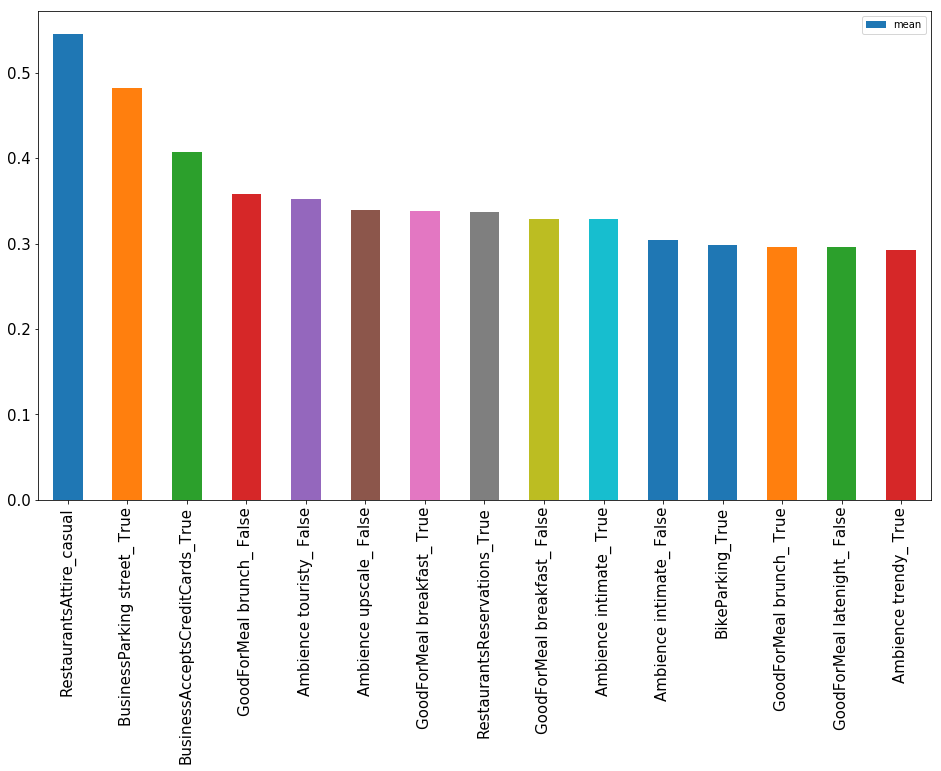

In [33]:
slectionDF[:15].plot(x=slectionDF[:15].index, y='mean', kind='bar', figsize=(16, 9), rot=90, fontsize=15)



Classification Report: 
             precision    recall  f1-score   support

        0.0       0.80      0.89      0.84      1378
        1.0       0.51      0.33      0.40       459

avg / total       0.73      0.75      0.73      1837



Accuracy :  75.28579205225911




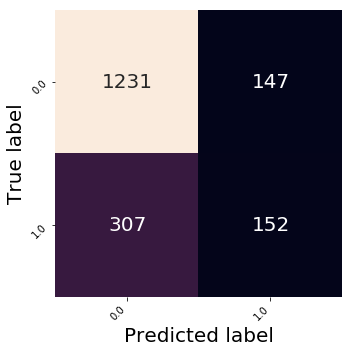

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

stdsc = StandardScaler()

stdsc.fit(X_train)

X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

#%%-----------------------------------------------------------------------
# perform training
# creating the classifier object
clf = KNeighborsClassifier(n_neighbors=3)

# performing training
clf.fit(X_train_std, y_train)

#%%-----------------------------------------------------------------------
# make predictions

# predicton on test
y_pred = clf.predict(X_test_std)

#%%-----------------------------------------------------------------------
# calculate metrics

print("\n")
print("Classification Report: ")
print(classification_report(y_test,y_pred))
print("\n")


print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")

#%%-----------------------------------------------------------------------
# confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
class_names = df1['stars'].unique()


df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()